In [1]:
# MFCC and Gaussian Mixture Models for Speaker Recognition
# EE4563 Introduction to Machine Learning
# Instructor: Sundeep Rangan
# Authors: Michael Chen, William Xia

In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wave, os, glob
%matplotlib inline

In [4]:
import librosa
import librosa.display
import librosa.feature
from sklearn.mixture import GaussianMixture as GMM

In [5]:
def preprocess_data(subject_num, block_size, threshold):
    """
    Given a subject number:
        - retrieve data from directory 
        - remove low power components
        - divide the continuous sound vector into uniform blocks
        - compute MFCC for each block
    
    Returns:
        - S, tensor of shape (num_samp, n_mels)
    
    """ 
    
    # Create empty vector to store data
    subject = []
    
    # Define path
    path = "/Users/willi/EE4563/speech_samples/subject_"+subject_num+"/left-headed"
    
    # Retrieve data from directory, concatenate all wav file data in the target directory
    for filename in glob.glob(os.path.join(path, '*.wav')):
        y, sr = librosa.load(filename)    
        subject = np.append(subject,y)

    # Remove low power components
    low_ind = (abs(subject) <= threshold)
    subject[low_ind] = 0
    
    subject_active = subject[subject != 0]
    
    num_samples = int(np.floor(len(subject_active)/block_size))
    
    # Reshape data into blocks of samples
    subject_seg = subject_active[0:(num_samples*block_size)]
    subject_seg = np.reshape(subject_seg,(num_samples,-1))
    
    block_time = (librosa.feature.melspectrogram(y=subject_seg[0,:], sr=sr, n_mels=128, fmax=8000)).shape[1]
    S = np.empty((0,128,block_time))
    
    print("SUBJECT ",subject_num)
    print("Generating MFCC for %d total samples." %num_samples)
    
    # Generate MFCC over each sample
    for n in range(0,num_samples):

        S = np.append(S,librosa.feature.melspectrogram(y=subject_seg[n,:], sr=sr, n_mels=128, fmax=8000)[None,:,:],axis = 0)
        if n % 500 == 0:
            print(n," samples done")
            
    print("* COMPLETE *")
    
    # Plot the spectrogram of the first block/sample
    librosa.display.specshow(librosa.logamplitude(S[0,:,:],ref_power=np.max),
                             y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram\nSubject %s Block 0' %subject_num)
    plt.tight_layout()
        
    return S[:,:,0]

In [6]:
def check_user(speech_samp,model1, model2, model3, model4):
    """
    Given a speech sample fragment and four possible speaker models:
        - determine how likely the sample came from each of the models
        - print the predicted speaker the speech sample belongs to
            
    Returns: NONE
    
    """ 
    
    # Score the speech sample using each given model
    scores = np.array(([model1.score(speech_samp),model2.score(speech_samp),
                        model3.score(speech_samp),model4.score(speech_samp)]))
    
    # The largest value in the score vector corresponds to the most likely speaker
    predicted_speaker = np.argmax(scores)+1
    print("The predicted speaker is subject %d" %predicted_speaker)
    

In [7]:
# Define basic parameters

block_size = 512
threshold = 0.05

SUBJECT  1
Generating MFCC for 6949 total samples.
0  samples done
500  samples done
1000  samples done
1500  samples done
2000  samples done
2500  samples done
3000  samples done
3500  samples done
4000  samples done
4500  samples done
5000  samples done
5500  samples done
6000  samples done
6500  samples done
* COMPLETE *


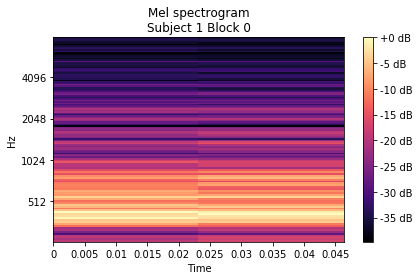

In [8]:
# Preprocess data for subject 1

subject = '1'
S1 = preprocess_data(subject,block_size,threshold)

SUBJECT  2
Generating MFCC for 10159 total samples.
0  samples done
500  samples done
1000  samples done
1500  samples done
2000  samples done
2500  samples done
3000  samples done
3500  samples done
4000  samples done
4500  samples done
5000  samples done
5500  samples done
6000  samples done
6500  samples done
7000  samples done
7500  samples done
8000  samples done
8500  samples done
9000  samples done
9500  samples done
10000  samples done
* COMPLETE *


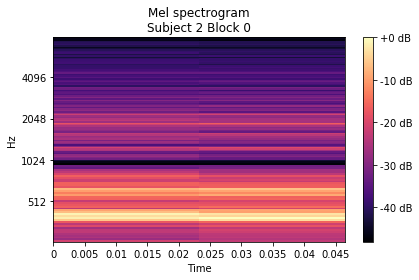

In [9]:
# Preprocess data for subject 2

subject = '2'
S2 = preprocess_data(subject,block_size,threshold)

SUBJECT  3
Generating MFCC for 6226 total samples.
0  samples done
500  samples done
1000  samples done
1500  samples done
2000  samples done
2500  samples done
3000  samples done
3500  samples done
4000  samples done
4500  samples done
5000  samples done
5500  samples done
6000  samples done
* COMPLETE *


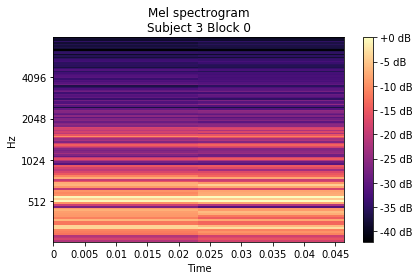

In [10]:
# Preprocess data for subject 3

subject = '3'
S3 = preprocess_data(subject,block_size,threshold)

SUBJECT  4
Generating MFCC for 5216 total samples.
0  samples done
500  samples done
1000  samples done
1500  samples done
2000  samples done
2500  samples done
3000  samples done
3500  samples done
4000  samples done
4500  samples done
5000  samples done
* COMPLETE *


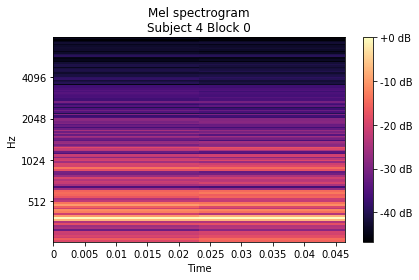

In [11]:
# Preprocess data for subject 4

subject = '4'
S4 = preprocess_data(subject,block_size,threshold)

In [12]:
# Split training/test data and fit Gaussian Mixture Model for subject 1
# Use 10 components for model and 500 samples for testing

ntr1 = S1.shape[0]-500

Xtr1 = S1[:ntr1,:]
Xts1 = S1[ntr1:,:]
gmm1 = GMM(n_components=10)

# Fit model to training data
gmm1.fit(Xtr1)

C:\Users\willi\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [13]:
# Split training/test data and fit Gaussian Mixture Model for subject 2
# Use 10 components for model and 500 samples for testing

ntr2 = S2.shape[0]-500

Xtr2 = S2[:ntr2,:]
Xts2 = S2[ntr2:,:]
gmm2 = GMM(n_components=10)

# Fit model to training data
gmm2.fit(Xtr2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [14]:
# Split training/test data and fit Gaussian Mixture Model for subject 3
# Use 10 components for model and 500 samples for testing

ntr3 = S3.shape[0]-500

Xtr3 = S3[:ntr3,:]
Xts3 = S3[ntr3:,:]
gmm3 = GMM(n_components=10)

# Fit model to training data
gmm3.fit(Xtr3)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [15]:
# Split training/test data and fit Gaussian Mixture Model for subject 4
# Use 10 components for model and 500 samples for testing

ntr4 = S4.shape[0]-500

Xtr4 = S4[:ntr4,:]
Xts4 = S4[ntr4:,:]
gmm4 = GMM(n_components=10)

# Fit model to training data
gmm4.fit(Xtr4)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [16]:
# Compute a matrix on the scores 
# Ideally, the values on the diagonals should be high, while the off-diagonal values low

scores = np.array(([gmm1.score(Xts1),gmm2.score(Xts1),gmm3.score(Xts1),gmm4.score(Xts1)],
                   [gmm1.score(Xts2),gmm2.score(Xts2),gmm3.score(Xts2),gmm4.score(Xts2)],
                   [gmm1.score(Xts3),gmm2.score(Xts3),gmm3.score(Xts3),gmm4.score(Xts3)],
                   [gmm1.score(Xts4),gmm2.score(Xts4),gmm3.score(Xts4),gmm4.score(Xts4)]))

print(scores)

[[ -18.95054373  -24.01940122  -64.23147662 -108.39379089]
 [ -64.57944897  -32.47458768 -124.34587273 -244.54387475]
 [-434.84706567 -349.78868188  -94.96446604 -584.01837991]
 [-232.75328256 -156.11545588   -2.95566051   -4.43034078]]


In [17]:
# Use the test data from each speaker to test the models

check_user(Xts1,gmm1,gmm2,gmm3,gmm4)
check_user(Xts2,gmm1,gmm2,gmm3,gmm4)
check_user(Xts3,gmm1,gmm2,gmm3,gmm4)
check_user(Xts4,gmm1,gmm2,gmm3,gmm4)

The predicted speaker is subject 1
The predicted speaker is subject 2
The predicted speaker is subject 3
The predicted speaker is subject 3


In [18]:
# NOTES:
#
# Based on the matrix of scores (similar a confusion matrix), we can see in row four
# that the data for speaker 4 is better modeled by the Gaussian Mixture for speaker 3.
# This becomes evident when we check each speaker's data and the models misclassify
# the fourth sample as belonging to speaker 3 when it correctly belonged to speaker 4.
#
# Smaller block sizes may have resulted in more samples and perhaps better accuracy.
# However, to save computation time, a larger block size and less samples were used.